# Strips Dataset
Script to genenerate a dataset composed of idenitified strips/patches of 256pp from the images from the original socrates dataset.


### Dataset structure:

* student_id1:
    * ori_img_name_x_y.png
* student_id1:
    * ori_img_name_x_y.png
* student_id1:
    * ori_img_name_x_y.png
* ...

The Train/Val/Test split will be done afterwards by assigning student id's to each set.

In [1]:
ori_datadir = "/home/data/socrates/"
out_datadir = "/home/data/strips_socrates"

In [3]:
import os
import cv2 
import numpy as np
import glob
import matplotlib.pyplot as plt

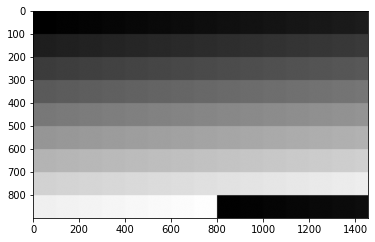

In [14]:
test = np.zeros((899, 1456, 3))
value = 0
for ystrip in range(0, 899, 100):
    for xstrip in range(0, 1456, 100):
        test[ystrip:ystrip+100, xstrip:xstrip+100, :] = (value % 255) / 255
        value += 2
plt.imshow(test)
    

In [ ]:
h = 899
w = 1456
num_vstrips = h // 256
num_hstrips = w // 256
strips = []
for x in range(num_hstrips):
    x0 = x * 256
    x1 = x0 + 256
    for y in range(num_vstrips):
        y0 = y * 256
        y1 = y0 + 256
        strip = test[y0:y1, x0:x1, :]
        strips.append(((x0,y0), strip))
for strip in strips:
    plt.figure()
    plt.suptitle(str(strip[0]))
    plt.imshow(strip[1])

In [ ]:
for img_file in os.scandir(ori_datadir):
    if not (img_file.path.endswith('.JPG') or img_file.path.endswith('.jpg')):
        print("Bad filetype: ", img_file.name)
        continue
    student_id = img_file.name.split('_')[1]
    outdir = os.path.join(out_datadir, student_id)
    try:
        os.mkdir(outdir)
    except OSError as error:
        if (error.errno == 17):
            pass
        else:
            print(error)
            print(error.errno)
    wimg = cv2.imread(img_file.path)
    height, width, channels = wimg.shape
    num_vstrips = height // 256
    num_hstrips = width // 256
    for x in range(num_hstrips):
        x0 = x * 256
        x1 = x0 + 256
        for y in range(num_vstrips):
            y0 = y * 256
            y1 = y0 + 256
            strip = wimg[y0:y1, x0:x1, :]
            or_name = img_file.name.split('.')[0]
            strip_name = or_name + "_" + str(x0) + "_" + str(y0) + ".PNG"
            cv2.imwrite(os.path.join(outdir, strip_name), strip)

Bad filetype:  Eurecom_135_video_005.mp4
Bad filetype:  Eurecom_100_video_007.mp4
Bad filetype:  Eurecom_123_video_006.mp4
Bad filetype:  Eurecom_139_video_010.mp4
Bad filetype:  Eurecom_105_video_004.mp4
Bad filetype:  Eurecom_102_video_003.mp4
Bad filetype:  Eurecom_128_video_006.MOV
Bad filetype:  Eurecom_110_video_005.mp4
Bad filetype:  Eurecom_133_video_002.mp4
Bad filetype:  Eurecom_139_video_004.mp4
Bad filetype:  Eurecom_135_video_010.mp4
Bad filetype:  Eurecom_136_video_005.MOV
Bad filetype:  Eurecom_107_video_008.mp4
Bad filetype:  Eurecom_126_video_009.mp4
Bad filetype:  Eurecom_138_video_003.mp4
Bad filetype:  Eurecom_123_video_004.mp4
Bad filetype:  Eurecom_131_video_002.mp4
Bad filetype:  Eurecom_131_video_009.mp4
Bad filetype:  Eurecom_131_video_011.mp4
Bad filetype:  Eurecom_126_video_010.mp4
Bad filetype:  Eurecom_141_video_001.mp4
Bad filetype:  Eurecom_111_video_005.mp4
Bad filetype:  Eurecom_110_video_009.mp4
Bad filetype:  Eurecom_111_video_007.mp4
Bad filetype:  E